In [1]:
import pandas as pd
import numpy as np
#import panel as pn
import os
#pn.extension('tabulator')

#import hvplot.pandas


import matplotlib.pyplot as plt
import math

In [73]:
#filepath = "/Users/Sunny/Desktop/viz_german_lm/results_data_freeze.csv"
filepath = "/Users/Sunny/Desktop/viz_german_lm/results_data.csv"

In [74]:
filepath

'/Users/Sunny/Desktop/viz_german_lm/results_data.csv'

In [75]:
df = pd.read_csv(filepath)
df

,dataset_name,eval_loss,eval_precision,eval_recall,eval_f1,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,batch_size,problem_description,label,eval_exact_match
0,german-ler,0.025341,0.000000,0.000000,0.000000,0.996068,7.6151,157.582,19.698,1.0,1200,bert-german,token_classification,4,NaN,NaN,NaN
1,german-europarl,0.005166,0.000000,0.000000,0.000000,0.998537,4.0836,293.860,36.733,1.0,1200,gpt2-wechsel-german,token_classification,4,NaN,NaN,NaN
2,germeval17,1.186676,NaN,NaN,NaN,0.655105,10.7325,239.088,29.909,1.0,2566,bert-german,classification,2,single_label_classification,sentiment,NaN
3,germeval18,0.357000,NaN,NaN,NaN,0.906710,24.8055,136.986,17.133,1.0,3398,gpt2-wechsel-german,classification,2,single_label_classification,multi,NaN
4,gnad10,0.540912,NaN,NaN,NaN,0.879377,4.3411,236.806,29.716,1.0,1028,gpt2-wechsel-german,classification,2,single_label_classification,label,NaN
5,germeval18,0.356252,NaN,NaN,NaN,0.895232,13.5999,249.854,31.250,1.0,3398,bert-german,classification,2,single_label_classification,multi,NaN
6,germeval17,0.649629,NaN,NaN,NaN,0.772408,132.3460,19.389,2.425,1.0,2566,bloom-1b7-german,classification,4,single_label_classification,sentiment,NaN
7,germeval18,0.357291,NaN,NaN,NaN,0.886404,192.5327,17.649,2.207,1.0,3398,bloom-1b7-german,classification,4,single_label_classification,multi,NaN
8,german-quad,NaN,NaN,NaN,59.363720,NaN,15.6752,242.612,30.366,1.0,3803,bert-german,question_answering,64,NaN,NaN,39.655172
9,german-ler,0.067448,0.625533,0.726894,0.672415,0.981669,19.5781,340.483,42.599,1.0,6666,gpt2-wechsel-german,token_classification,64,NaN,NaN,NaN


In [58]:
df.fillna(0,inplace=True)
idf = df.interactive()
df

AttributeError: 'DataFrame' object has no attribute 'interactive'

In [81]:
df_cls = df[df.problem_type == "classification"]
df_cls = df_cls.drop_duplicates(ignore_index = True)
df_cls


,dataset_name,eval_loss,eval_precision,eval_recall,eval_f1,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,batch_size,problem_description,label,eval_exact_match
0,germeval17,1.186676,NaN,NaN,NaN,0.655105,10.7325,239.088,29.909,1.0,2566,bert-german,classification,2,single_label_classification,sentiment,NaN
1,germeval18,0.357000,NaN,NaN,NaN,0.906710,24.8055,136.986,17.133,1.0,3398,gpt2-wechsel-german,classification,2,single_label_classification,multi,NaN
2,gnad10,0.540912,NaN,NaN,NaN,0.879377,4.3411,236.806,29.716,1.0,1028,gpt2-wechsel-german,classification,2,single_label_classification,label,NaN
3,germeval18,0.356252,NaN,NaN,NaN,0.895232,13.5999,249.854,31.250,1.0,3398,bert-german,classification,2,single_label_classification,multi,NaN
4,germeval17,0.649629,NaN,NaN,NaN,0.772408,132.3460,19.389,2.425,1.0,2566,bloom-1b7-german,classification,4,single_label_classification,sentiment,NaN
5,germeval18,0.357291,NaN,NaN,NaN,0.886404,192.5327,17.649,2.207,1.0,3398,bloom-1b7-german,classification,4,single_label_classification,multi,NaN
6,gnad10,0.442439,NaN,NaN,NaN,0.903696,53.1273,19.350,2.428,1.0,1028,gpt2-xl-german,classification,4,single_label_classification,label,NaN
7,germeval17,0.726987,NaN,NaN,NaN,0.804365,18.0062,142.506,17.827,1.0,2566,gpt2-wechsel-german,classification,2,single_label_classification,sentiment,NaN
8,germeval17,0.649629,NaN,NaN,NaN,0.762408,53.1273,19.350,2.428,1.0,1028,gpt2-xl-german,classification,4,single_label_classification,label,NaN
9,germeval18,0.006885,NaN,NaN,NaN,0.999706,53.1273,19.350,2.428,1.0,1028,gpt2-xl-german,classification,4,single_label_classification,label,NaN


['germeval18', 'germeval17', 'gnad10']
['bloom-1b7-german', 'gpt2-wechsel-german', 'bert-german', 'gpt2-xl-german']
[['GERMAN-EVAL-2018 (HATE-SPEECH)', 0.8864037394523621, 0.906709849834442, 0.8952324986457825, 0.999705731868744], ['GERMAN-EVAL-2017 (SENTIMENT)', 0.7724084258079529, 0.8043647408485413, 0.6551052331924438, 0.7624084258079529], ['GNAD10 (NEWS)', 0.8949416279792786, 0.8793774247169495, 0.911478579044342, 0.9036964774131776]]
['Tasks', 'bloom-1b7-german', 'gpt2-wechsel-german', 'bert-german', 'gpt2-xl-german']


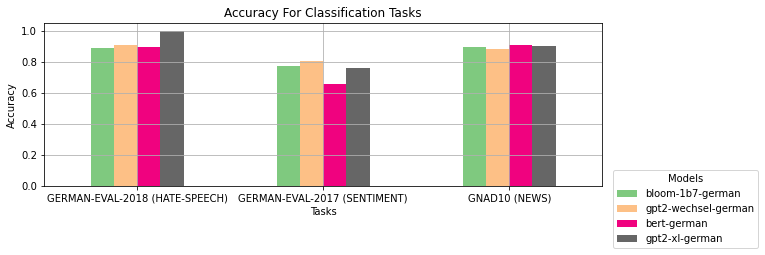

In [82]:
from matplotlib import cm
import matplotlib as mpl

nice_dataset_names = {
    'germeval18': 'GERMAN-EVAL-2018 (HATE-SPEECH)',
    'german-quad': 'GERMAN-QUAD',
    'germeval17': 'GERMAN-EVAL-2017 (SENTIMENT)',
    'german-ler': 'GERMAN-LEGAL-ENTITY-RECOGNITION',
    'gnad10': 'GNAD10 (NEWS)',
    'german-europarl': 'GERMAN-EUROPARL'
}

ds_name = list(set(df_cls.dataset_name))
print(ds_name)

model_name = list(set(df_cls.model_name))
#model_name = ['bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german', 'bloom-7b1-twc-german', 'bloom-1b7-german']
print(model_name)

cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])

all_evals = []
for each_ds in ds_name:
    curr_ds_list = list()
    curr_ds_list.append(nice_dataset_names[str(each_ds)])
    #curr_ds_list.append(str(each_ds))
    for each_model in model_name:
        #df_subset = df_cls[(df_cls.dataset_name == each_ds) & (df_cls.model_name == each_model)]
        df_subset = df_cls.loc[(df_cls['dataset_name'] == each_ds) & (df_cls['model_name'] == each_model)]
        #print(each_ds)
        #print(each_model)
        #print(df_subset)
        if(df_subset.empty == False):
            #print(df_subset)
            #print(each_ds)
            #print(each_model)
            curr_eval = df_subset['eval_accuracy'].values[0]
            #print(curr_eval)
            curr_ds_list.append(curr_eval)
        
    all_evals.append(curr_ds_list)


print(all_evals)
    
colors = plt.cm.get_cmap('inferno')
    
#df_new = pd.DataFrame(all_evals, columns = ['Models', 'bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german'])
columns = ['Tasks'] +  model_name
print(columns)
df_new = pd.DataFrame(all_evals, columns = columns)
df_new.plot(
    x='Tasks', 
    kind = 'bar', 
    stacked = False, 
    title='Accuracy For Classification Tasks',
    #xlabel = 'Datasets',
    ylabel = 'Accuracy',
    colormap='Accent',
)


plt.rcParams["figure.figsize"] = (10,3)
#plt.xlabel('Datasets', rotation=0, fontsize=10, labelpad=20)
plt.xticks(rotation = 360)
plt.grid()
#plt.legend(title = 'Models (Frozen Embeddings)', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
#plt.savefig('classification_res_freeze.png', bbox_inches='tight')

plt.legend(title = 'Models', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
plt.savefig('classification_res.png', bbox_inches='tight')


In [78]:
df_ner = df[df.problem_type == "token_classification"]
df_ner = df_ner.drop_duplicates(ignore_index = True)
df_ner


,dataset_name,eval_loss,eval_precision,eval_recall,eval_f1,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,batch_size,problem_description,label,eval_exact_match
0,german-ler,0.025341,0.000000,0.000000,0.000000,0.996068,7.6151,157.582,19.698,1.0,1200,bert-german,token_classification,4,NaN,NaN,NaN
1,german-europarl,0.005166,0.000000,0.000000,0.000000,0.998537,4.0836,293.860,36.733,1.0,1200,gpt2-wechsel-german,token_classification,4,NaN,NaN,NaN
2,german-ler,0.067448,0.625533,0.726894,0.672415,0.981669,19.5781,340.483,42.599,1.0,6666,gpt2-wechsel-german,token_classification,64,NaN,NaN,NaN
3,german-ler,0.043573,0.000000,0.000000,0.000000,0.988506,7.6151,157.582,19.698,1.0,1200,gpt2-xl-german,token_classification,4,NaN,NaN,NaN
4,german-europarl,0.007036,0.000000,0.000000,0.000000,0.997278,7.6151,157.582,19.698,1.0,1200,gpt2-xl-german,token_classification,4,NaN,NaN,NaN
5,german-ler,0.067229,0.000000,0.000000,0.000000,0.988835,7.6151,157.582,19.698,1.0,1200,gpt2-wechsel-german,token_classification,4,NaN,NaN,NaN
6,german-ler,0.041798,0.736861,0.825863,0.778827,0.987625,85.9896,77.521,9.699,1.0,6666,bloom-1b7-german,token_classification,4,NaN,NaN,NaN
7,german-europarl,0.008036,0.000000,0.000000,0.000000,0.999422,7.6151,157.582,19.698,1.0,1200,bert-german,token_classification,4,NaN,NaN,NaN
8,german-europarl,0.001245,0.000000,0.000000,0.000000,0.999422,7.6151,157.582,19.698,1.0,1200,bloom-1b7-german,token_classification,4,NaN,NaN,NaN
9,german-europarl,0.001245,0.000000,0.000000,0.000000,0.999422,7.7013,155.818,19.477,1.0,1200,bloom-1b7-german,token_classification,4,NaN,NaN,NaN


['german-europarl', 'german-ler']
['bloom-1b7-german', 'gpt2-wechsel-german', 'bert-german', 'gpt2-xl-german']
german-europarl
bloom-1b7-german
german-europarl
gpt2-wechsel-german
german-europarl
bert-german
german-europarl
gpt2-xl-german
german-ler
bloom-1b7-german
german-ler
gpt2-wechsel-german
german-ler
bert-german
german-ler
gpt2-xl-german
[['GERMAN-EUROPARL', 0.9994216113228088, 0.9985370168753402, 0.9994216113228088, 0.9972781709308656], ['GERMAN-LEGAL-ENTITY-RECOGNITION', 0.9876247954269424, 0.9816693161515412, 0.9960680905371422, 0.988506393933852]]


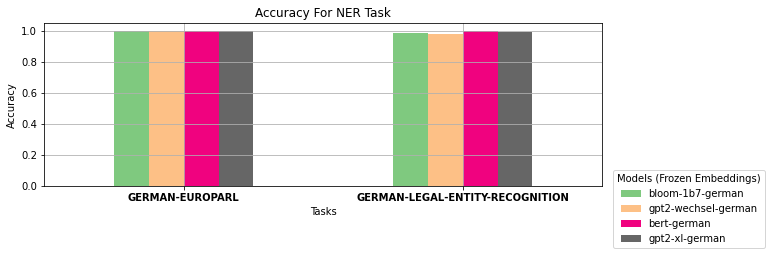

In [79]:
from matplotlib import cm

ds_name = list(set(df_ner.dataset_name))
print(ds_name)

model_name = list(set(df_cls.model_name))
#model_name = ['bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german']
print(model_name)

all_evals = []
for each_ds in ds_name:
    curr_ds_list = list()
    #curr_ds_list.append(str(each_ds))
    curr_ds_list.append(nice_dataset_names[str(each_ds)])
    for each_model in model_name:
        df_subset = df_ner[(df_ner.dataset_name == each_ds) & (df_ner.model_name == each_model)]
        if(df_subset.empty == False):
            #print(df_subset)
            print(each_ds)
            print(each_model)
            curr_eval = df_subset['eval_accuracy'].values[0]
            #print(curr_eval)
            curr_ds_list.append(curr_eval)
        
    all_evals.append(curr_ds_list)


print(all_evals)
    
colors = plt.cm.get_cmap('inferno')
columns = ['Tasks'] + model_name


df_new = pd.DataFrame(all_evals, columns = columns)
df_new.plot(
    x='Tasks', 
    kind = 'bar', 
    stacked = False, 
    title='Accuracy For NER Task',
    #xlabel = 'Datasets',
    ylabel = 'Accuracy',
    colormap='Accent',
)

plt.rcParams["figure.figsize"] = (10,3)
#plt.xlabel('Datasets', rotation=0, fontsize=10, labelpad=20)
plt.xticks(rotation = 360, weight = 'bold')
plt.grid()

#plt.legend(title = 'Models (Frozen Embeddings)', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
#plt.savefig('ner_res_freeze.png', bbox_inches='tight')

plt.legend(title = 'Models', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
plt.savefig('ner_res.png', bbox_inches='tight')


In [63]:
df_qa = df[df.problem_type == "question_answering"]
df_qa = df_qa.drop_duplicates(ignore_index = True)
df_qa

,dataset_name,eval_loss,eval_precision,eval_recall,eval_f1,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,batch_size,problem_description,label,eval_exact_match
0,german-quad,0.0,0.0,0.0,59.36372,0.0,15.6752,242.612,30.366,1.0,3803,bert-german,question_answering,64,0,0,39.655172


['german-quad']
['bloom-1b7-german', 'gpt2-wechsel-german', 'bert-german', 'gpt2-xl-german']
[['GERMAN-QUAD', 59.36371998958213]]


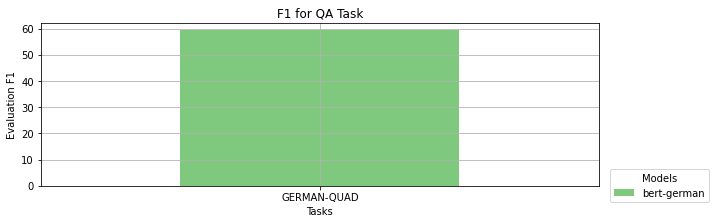

In [64]:
from matplotlib import cm

ds_name = list(set(df_qa.dataset_name))
print(ds_name)

model_name = list(set(df_cls.model_name))
#model_name = ['bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german']
print(model_name)

all_evals = []
for each_ds in ds_name:
    curr_ds_list = list()
    #curr_ds_list.append(str(each_ds))
    curr_ds_list.append(nice_dataset_names[str(each_ds)])
    for each_model in model_name:
        df_subset = df_qa[(df_qa.dataset_name == each_ds) & (df_qa.model_name == each_model)]
        if(df_subset.empty == False):
            #print(df_subset)
            #print(each_ds)
            #print(each_model)
            curr_eval = df_subset['eval_f1'].values[0]
            curr_ds_list.append(curr_eval)
            #print(curr_eval)
        
        
    all_evals.append(curr_ds_list)


print(all_evals)
    
colors = plt.cm.get_cmap('inferno')
    
df_new = pd.DataFrame(all_evals, columns = ['Tasks', 'bert-german'])
df_new.plot(
    x='Tasks', 
    kind = 'bar', 
    stacked = False, 
    title='F1 for QA Task',
    #xlabel = 'Datasets',
    ylabel = 'Evaluation F1',
    colormap='Accent',
)

plt.rcParams["figure.figsize"] = (2,2)
#plt.xlabel('Datasets', rotation=0, fontsize=10, labelpad=20)
plt.xticks(rotation = 360)
plt.grid()
#plt.legend(title = 'Models (Frozen Embeddings)', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
#plt.savefig('qa_res_freeze.png', bbox_inches='tight')

plt.legend(title = 'Models', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
plt.savefig('qa_res.png', bbox_inches='tight')


In [6]:
class_widget = pn.widgets.Select(name = 'model_name', options = ['gpt2-wechsel', 'bert-german'])

idf_filtered = idf[(idf.problem_type == "classification") & (idf.model_name == class_widget)]
classification_plot = idf_filtered.hvplot(kind = "bar", x="dataset_name", y ="eval_accuracy", colorbar = "True", 
                                          ylabel = "Evaluation Accuracy",
                                          xlabel = "Datasets",
                                          title = "Classification Task Performance",
                                          color=["#f16a6f"],
                                         )

pn.Row(classification_plot)

Row
    [0] Interactive(Interactive)

In [7]:
ner_widget = pn.widgets.Select(name = 'model_name', options = ['gpt2-wechsel', 'bert-german'])

idf_filtered = idf[(idf.problem_type == "token_classification") & (idf.model_name == ner_widget)]
ner_plot = idf_filtered.hvplot(kind = "bar", x="dataset_name", y ="eval_accuracy", colorbar = "false",
                                ylabel = "Evaluation Accuracy",
                                xlabel = "Datasets",
                               title = "NER Task Performance",
                               color = ["#1e85f7"]
                              )

pn.Row(ner_plot)

Row
    [0] Interactive(Interactive)

In [8]:
qa_widget = pn.widgets.Select(name = 'model_name', options = ['bert-german'])

idf_filtered = idf[(idf.problem_type == "question_answering") & (idf.model_name == qa_widget)]
qa_plot = idf_filtered.hvplot(kind = "bar", x="dataset_name", y="eval_f1", colorbar = "false", 
                                ylabel = "Evaluation F1",
                                xlabel = "Datasets",
                                title = "QA Task Performance"
                             )

pn.Row(qa_plot)

Row
    [0] Interactive(Interactive)

In [9]:
idf_filtered = idf[["dataset_name", "model_name", "batch_size", "epoch", "eval_runtime"]]

raw_table = idf_filtered.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
raw_table

In [10]:
main_widget = pn.widgets.Select(name = 'model_name', options = ['bert-german', 'gpt2-wechsel'])


template = pn.template.FastListTemplate(
    title='Performance of German LLMs', 
    #sidebar=[pn.pane.Markdown("#"), 
    #         pn.pane.Markdown(""), 
    #         pn.pane.Markdown("#"),   
    #         ],
    
    
    main=[pn.Row(pn.Column(class_widget, 
                           classification_plot.panel(width=700), margin=(0,25)), 
                 raw_table.panel(width=500)), 
          pn.Row(pn.Column(ner_widget, ner_plot.panel(width=600), margin=(0,25)), 
                 pn.Column(qa_widget, qa_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
                 
template.show()
#template.servable()

Launching server at http://localhost:49403
